**Initialization and Setup**

In [2]:
import sqlite3
import pandas as pd

pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

conn=sqlite3.connect('data/database.sqlite')
cur=conn.cursor()

**Load tables from database**

In [3]:
country = pd.read_sql_query('SELECT * from Country;',conn)
league = pd.read_sql_query('SELECT * from League;',conn)
match = pd.read_sql_query('SELECT * from Match;',conn)
player=pd.read_sql_query('SELECT * from Player;',conn)
player_atr=pd.read_sql_query('SELECT * from Player_Attributes;',conn)
team=pd.read_sql_query('SELECT * from Team;',conn)
team_atr=pd.read_sql_query('SELECT * from Team_Attributes;',conn)

In [4]:
country['league']=league['name']
country

,id,name,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


**Exploring features in team attributes**

In [5]:
team_atr_avg=(team_atr.merge(team[['team_api_id','team_long_name']],on='team_api_id')
         .groupby(['team_long_name'])
         .mean()
         .reset_index()
         .drop(['id'],axis=1))
team_atr_corr=team_atr_avg[['buildUpPlaySpeed','buildUpPlayDribbling',
'buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing',
'chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']].corr()
team_atr_corr

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
buildUpPlaySpeed,1.000000,0.053433,0.418722,0.363649,0.201541,-0.000680,-0.030576,0.178015,0.046592
buildUpPlayDribbling,0.053433,1.000000,-0.193398,0.100827,-0.015298,0.117514,-0.008592,-0.064082,0.058054
buildUpPlayPassing,0.418722,-0.193398,1.000000,0.196836,0.245219,-0.160674,-0.120450,0.169760,0.024429
chanceCreationPassing,0.363649,0.100827,0.196836,1.000000,0.308354,0.106868,0.188930,0.139261,0.135817
chanceCreationCrossing,0.201541,-0.015298,0.245219,0.308354,1.000000,-0.038697,0.070000,0.041872,0.123781
chanceCreationShooting,-0.000680,0.117514,-0.160674,0.106868,-0.038697,1.000000,0.223202,0.124339,0.177075
defencePressure,-0.030576,-0.008592,-0.120450,0.188930,0.070000,0.223202,1.000000,0.427082,0.574639
defenceAggression,0.178015,-0.064082,0.169760,0.139261,0.041872,0.124339,0.427082,1.000000,0.341695
defenceTeamWidth,0.046592,0.058054,0.024429,0.135817,0.123781,0.177075,0.574639,0.341695,1.000000


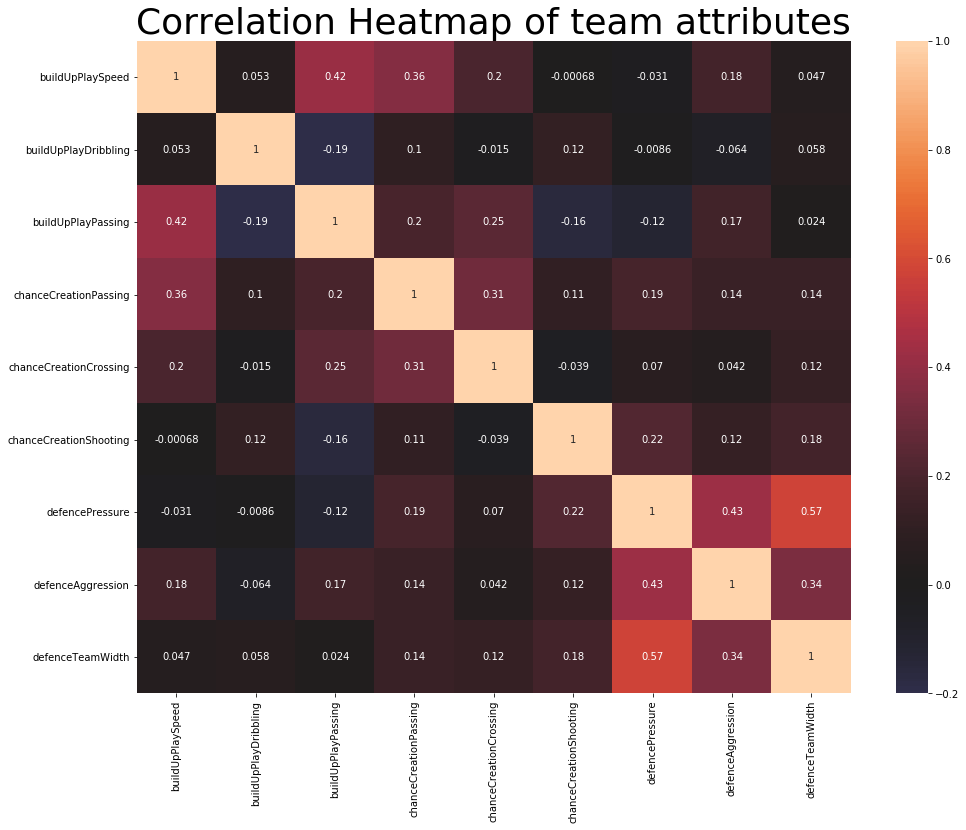

In [166]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(16,12))
ax=sns.heatmap(team_atr_corr,vmin=-0.2,vmax=1,center=0,annot=True)
ax.set_title('Correlation Heatmap of team attributes',size=36)
plt.savefig('images/teamheatmap.png',transparent=True)

**Expoloring player data**

In [9]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
player_info=player_atr.merge(player[['player_api_id','player_name','birthday','height','weight']],
                             on='player_api_id')
# player_info=player_info.groupby(['player_name']).mean().reset_index()

In [11]:
player_avg=(player_info.groupby(['player_name'])
                       .mean()
                       .reset_index())
player_atr_corr=player_avg[['overall_rating','potential','crossing', 'finishing', 'heading_accuracy',
                               'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                               'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                               'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                               'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                               'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                               'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                               'gk_reflexes','height','weight']].corr()


In [12]:
player_avg[['overall_rating','potential','crossing', 'finishing', 'heading_accuracy',
                               'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                               'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                               'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                               'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                               'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                               'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                               'gk_reflexes']].describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10390.000000,10848.000000,10390.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10390.000000,10848.000000,10390.000000,10848.000000,10390.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10390.000000,10848.000000,10848.000000,10848.000000,10390.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000
mean,66.797845,72.080306,52.906043,47.880555,56.136268,60.415425,47.156073,56.922923,50.455206,47.352713,55.199374,61.174821,66.414245,66.806224,64.425084,64.048981,64.494772,59.494515,66.026849,65.473600,66.631872,50.818879,59.526677,51.149818,53.956360,55.897250,53.689382,46.231822,49.452695,47.126850,14.848574,16.605758,22.933706,16.680659,16.982886
std,6.226819,5.792544,16.048506,18.022672,15.546086,13.411948,17.254666,16.750250,17.202504,16.216087,12.936530,14.456104,11.549180,11.172323,12.114179,8.070134,11.211899,15.173216,9.535789,11.221597,10.978755,17.175255,14.824955,17.375837,16.595592,13.980147,13.773108,19.942833,20.226549,20.481022,16.628311,15.304346,17.436414,15.514604,16.582804
min,43.000000,51.000000,6.000000,5.000000,8.000000,10.571429,3.750000,5.142857,5.714286,6.000000,11.333333,9.000000,15.000000,17.000000,21.000000,27.000000,20.000000,9.923077,21.000000,16.000000,21.500000,6.000000,11.000000,6.250000,4.000000,8.000000,9.000000,5.000000,6.000000,5.000000,1.000000,3.260870,3.260870,3.260870,3.260870
25%,62.800000,68.000000,43.586525,32.594737,49.156883,55.691106,33.333333,49.265789,39.000000,35.642857,47.326087,57.000000,60.000000,61.000000,57.000000,59.000000,58.272727,52.141234,60.055556,60.142857,60.141234,38.983333,50.500000,36.256048,44.590241,47.500000,44.897222,25.000000,29.160441,25.733333,7.793103,9.500000,11.095308,9.461538,9.400000
50%,66.705882,72.000000,56.333333,49.904545,58.787594,63.000000,49.285714,61.085455,52.600000,48.000000,57.000000,64.250000,67.818182,68.100000,65.730769,64.563859,65.666667,62.833333,66.884444,67.153846,67.820856,54.835586,62.288690,55.093074,57.777778,57.747549,55.000000,50.000000,55.108187,52.108187,10.142857,12.500000,16.319091,12.500000,12.444444
75%,70.916667,76.000000,64.652174,63.000000,66.700000,69.000000,60.712381,68.666667,63.469013,59.617788,64.454545,70.315789,74.320357,74.444444,73.000000,69.571429,72.000000,70.333333,72.307692,72.857143,74.200000,63.955040,70.566770,65.181818,66.038194,66.000000,63.876250,64.042120,67.000000,65.000000,13.000000,15.363636,27.151261,15.400000,15.360000
max,92.192308,95.230769,89.357143,92.230769,93.111111,95.181818,90.789474,96.461538,92.571429,90.488889,94.155556,95.769231,95.787879,95.696970,94.666667,92.538462,94.312500,93.076923,94.311111,93.181818,95.000000,90.000000,93.666667,91.750000,93.200000,95.681818,92.000000,90.666667,90.200000,94.366667,89.863636,86.875000,89.000000,91.625000,90.954545


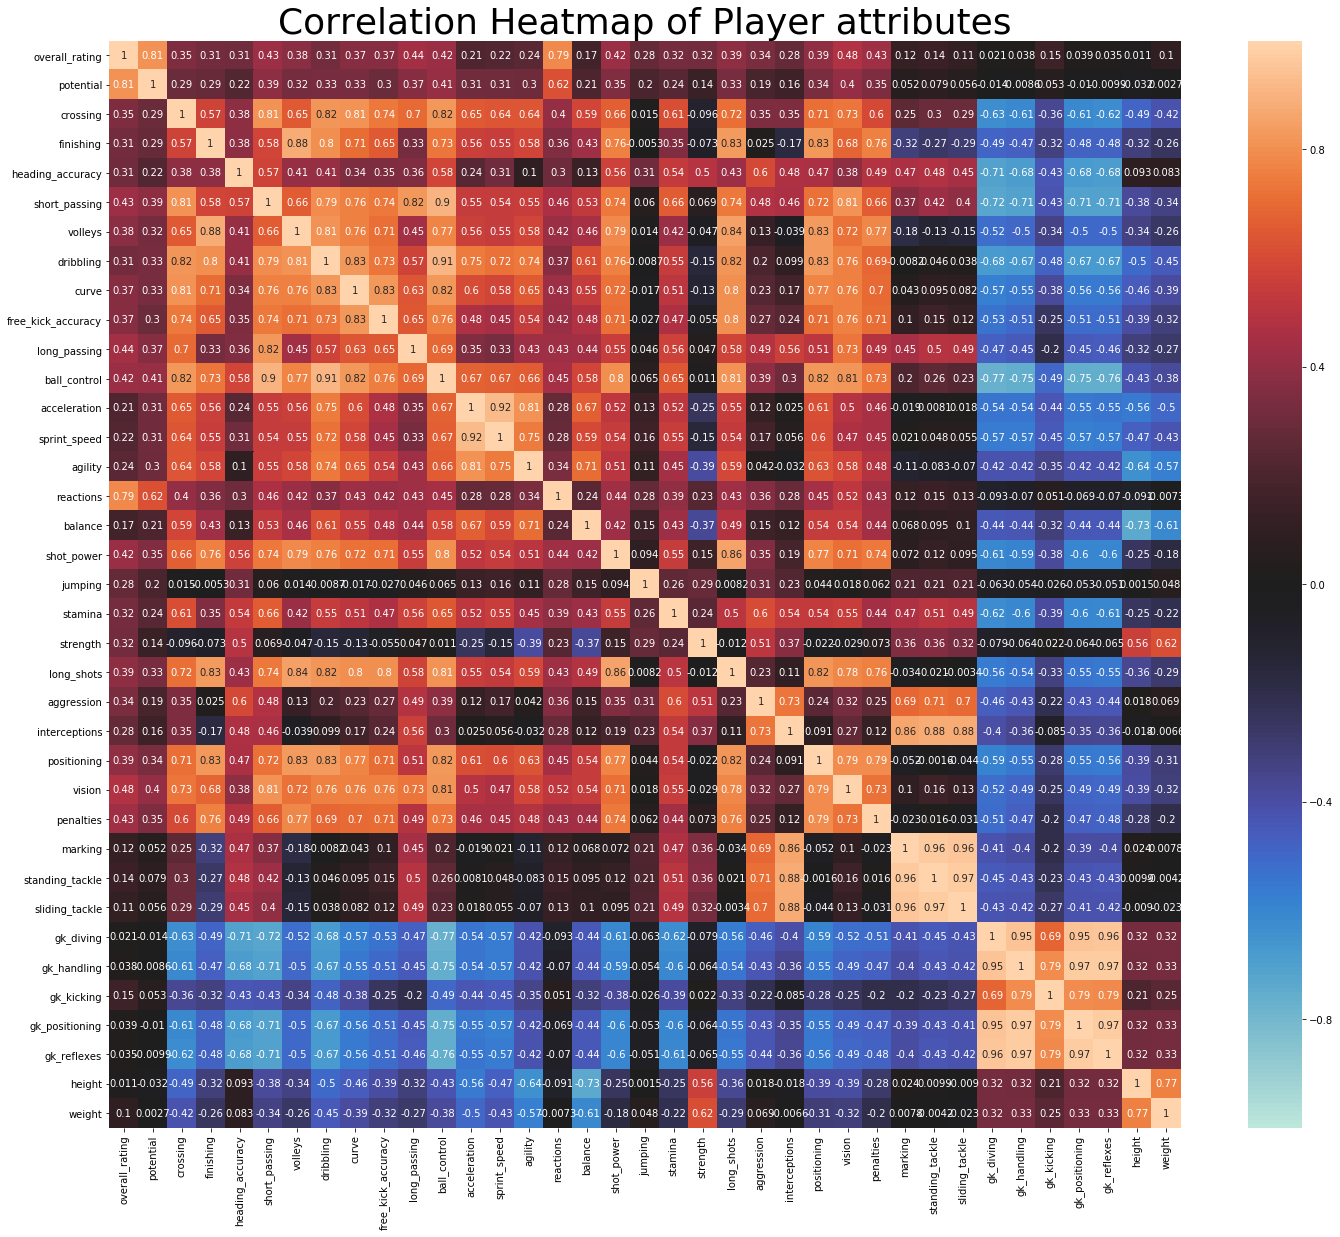

In [165]:
player_atr_corr
fig,ax=plt.subplots(figsize=(24,20))
ax=sns.heatmap(player_atr_corr,vmin=-1,vmax=1,center=0,annot=True)
ax.set_title('Correlation Heatmap of Player attributes',size=36)
plt.savefig('images/playerheatmap.png',transparent=True)
plt.show()
# ax.set_title('Correlation Heatmap of Player attributes',size=16)

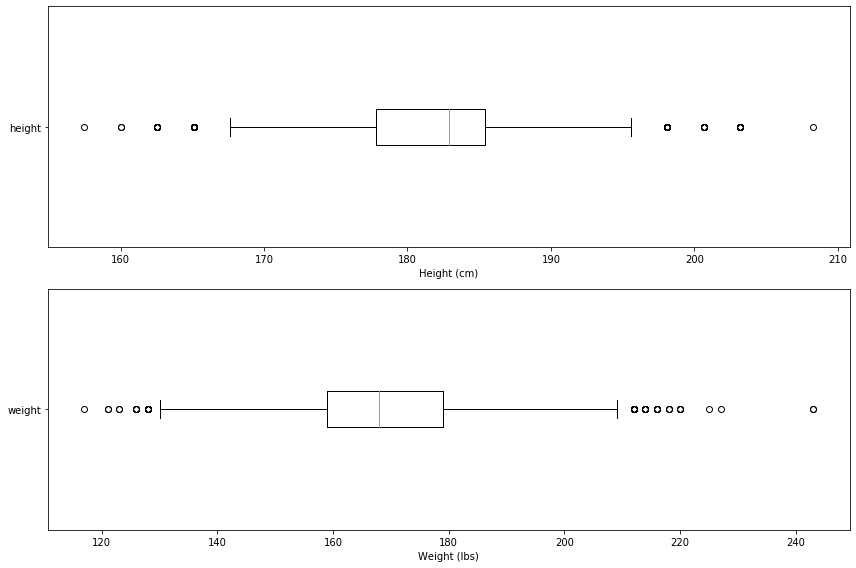

In [167]:
# plt.boxplot([player['height'],player['weight']])
fig,axs=plt.subplots(2,1,figsize=(12,8))

axs[0].boxplot(player['height'],vert=False,labels=['height'])
axs[1].boxplot(player['weight'],vert=False,labels=['weight'])

# axs[0].hist(player['height'],bins=20,color='skyblue')
# axs[1].hist(player['weight'],bins=20,color='skyblue')
# axs[0].set_title("Players' Heights",size=16)
axs[0].set_xlabel('Height (cm)')
# axs[0].set_ylabel('Frequency')
# axs[1].set_title("Players' Weights",size=16)
axs[1].set_xlabel('Weight (lbs)')
# axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('images/wandh_box.png',transparent=True)

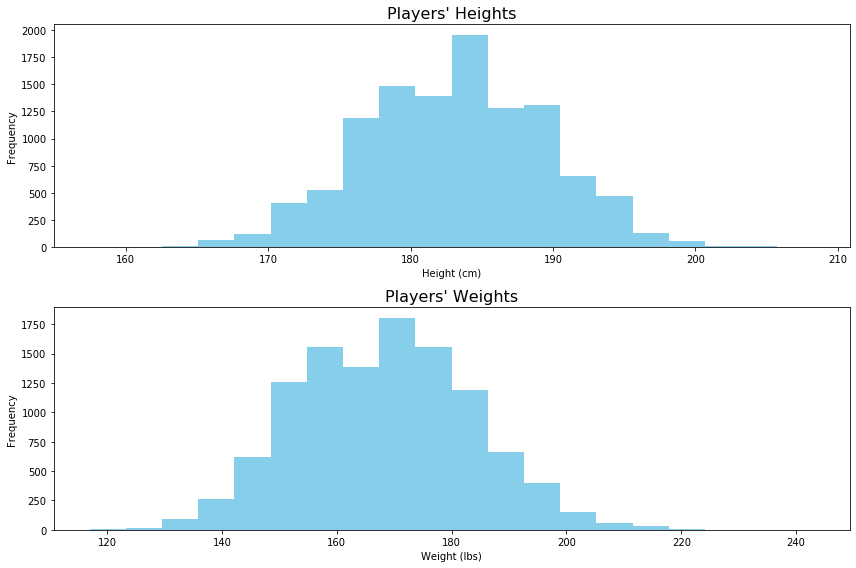

In [15]:
fig,axs=plt.subplots(2,1,figsize=(12,8))

axs[0].hist(player['height'],bins=20,color='skyblue')
axs[1].hist(player['weight'],bins=20,color='skyblue')
axs[0].set_title("Players' Heights",size=16)
axs[0].set_xlabel('Height (cm)')
axs[0].set_ylabel('Frequency')
axs[1].set_title("Players' Weights",size=16)
axs[1].set_xlabel('Weight (lbs)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('images/wandh.png')

In [16]:
player_height_weight=player_avg[['height','weight']].groupby(['weight']).mean().reset_index()
player_height_rate=player_avg[['height','overall_rating']].groupby(['height']).mean().reset_index()
player_weight_rate=player_avg[['weight','overall_rating']].groupby(['weight']).mean().reset_index()
# player_height_rate

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


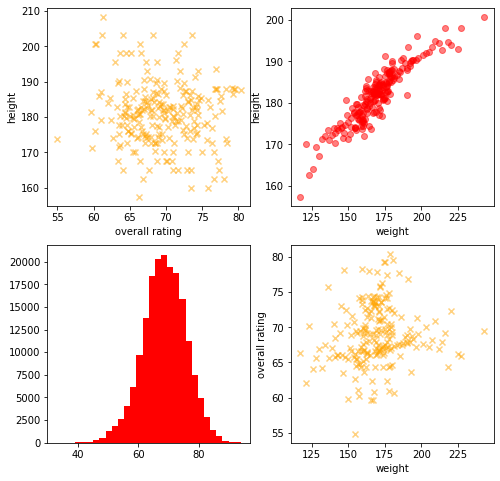

In [168]:
fig,axs=plt.subplots(2,2,figsize=(8,8))
# for i,ax in enumerate(axs.flatten()):
# axs[0,1]=sns.lmplot(x='height',y='weight',data=player)
axs[0,0].scatter(player_height_rate['overall_rating'],
                 player_height_rate['height']
                ,marker='x',alpha=0.5,c='orange')
axs[0,0].set_xlabel('overall rating')
axs[0,0].set_ylabel('height')
axs[0,1].scatter(player_height_weight['weight'],
                 player_height_weight['height']
                ,marker='o',alpha=0.5,c='r')
axs[0,1].set_xlabel('weight')
axs[0,1].set_ylabel('height')
axs[1,0].hist(player_info['overall_rating'],bins=30,color='r')
axs[1,1].scatter(player_weight_rate['weight'],
                 player_weight_rate['overall_rating']
                 ,marker='x',alpha=0.5,c='orange')
axs[1,1].set_xlabel('weight')
axs[1,1].set_ylabel('overall rating')
plt.savefig('images/w_h_overall_rating.png',transparent=True)
plt.show()

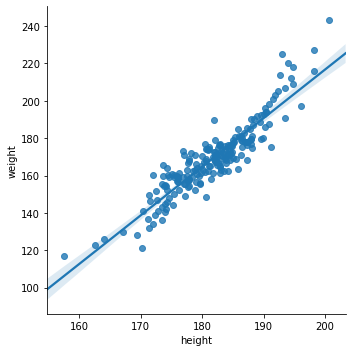

In [18]:
axs[0,1]=sns.lmplot(x='height',y='weight',data=player_height_weight)
plt.savefig('images/wvsh.png')

**Now taking a look at betting odds**

In [19]:
epl=match#[(match['league_id']==1729)]
epl['results']=np.where((epl['home_team_goal']-epl['away_team_goal'])>0,'H',
                        np.where((epl['home_team_goal']-epl['away_team_goal'])==0,'D','A'))
epl_bet=epl.drop(['id','country_id','league_id','match_api_id'],axis=1)
epl_bet.drop(epl.columns[11:85],axis=1,inplace=True)
epl_bet=epl_bet.reset_index().drop(['index'],axis=1)

team_name=team.set_index('team_api_id')['team_long_name'].to_dict()
epl_bet['Home']=epl_bet['home_team_api_id'].map(team_name)
epl_bet['Away']=epl_bet['away_team_api_id'].map(team_name)

epl_bet_col=epl_bet.columns
h=[]
d=[]
a=[]
for i,n in enumerate(epl_bet_col):
    if n.endswith('H'):
        h.append(n)
    elif n.endswith('A'):
        a.append(n)
    elif n.endswith('D'):
        d.append(n)
        
# print(h)
# print(a)
# print(d)

In [20]:
epl_bet['max_Home_odds']=epl_bet[h].max(axis=1)
epl_bet['max_Away_odds']=epl_bet[a].max(axis=1)
epl_bet['max_Draw_odds']=epl_bet[d].max(axis=1)
# epl_bet['max_Home_odds']=h
# epl_bet['max_Away_odds']=a
# epl_bet['max_Draw_odds']=d

In [21]:
epl_bet.head(50)

,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,results,Home,Away,max_Home_odds,max_Away_odds,max_Draw_odds
0,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.50,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,D,KRC Genk,Beerschot AC,1.90,5.00,3.40
1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.50,1.90,3.20,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,D,SV Zulte-Waregem,Sporting Lokeren,2.00,3.95,3.30
2,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.30,2.50,3.20,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,A,KSV Cercle Brugge,RSC Anderlecht,2.63,2.75,3.30
3,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.00,1.44,3.60,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,H,KAA Gent,RAEC Mons,1.50,7.50,4.00
4,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.70,4.00,3.40,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,A,FCV Dender EH,Standard de Liège,5.00,1.73,3.50
5,2008/2009,1,2008-09-24 00:00:00,8203,8342,1,1,4.75,3.40,1.67,4.85,3.40,1.65,3.70,3.2,1.80,5.00,3.25,1.62,NaN,NaN,NaN,4.20,3.40,1.70,5.50,3.75,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN,D,KV Mechelen,Club Brugge KV,5.50,1.80,3.75
6,2008/2009,1,2008-08-16 00:00:00,9999,8571,2,2,2.10,3.20,3.30,2.05,3.25,3.15,1.85,3.2,3.50,1.83,3.30,3.60,NaN,NaN,NaN,1.83,3.30,3.60,1.91,3.40,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10,D,KSV Roeselare,KV Kortrijk,2.10,3.75,3.40
7,2008/2009,1,2008-08-16 00:00:00,4049,9996,1,2,3.20,3.40,2.20,2.55,3.30,2.40,2.40,3.2,2.40,2.50,3.20,2.50,NaN,NaN,NaN,2.70,3.25,2.25,2.60,3.40,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20,A,Tubize,Royal Excel Mouscron,3.20,2.50,3.40
8,2008/2009,1,2008-08-16 00:00:00,10001,9986,1,0,2.25,3.25,2.88,2.30,3.25,2.70,2.10,3.1,3.00,2.25,3.20,2.75,NaN,NaN,NaN,2.20,3.25,2.75,2.20,3.30,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80,H,KVC Westerlo,Sporting Charleroi,2.30,3.10,3.30
9,2008/2009,10,2008-11-01 00:00:00,8342,8571,4,1,1.30,5.25,9.50,1.25,5.00,10.00,1.30,4.2,8.00,1.25,4.50,10.00,NaN,NaN,NaN,1.35,4.20,7.00,1.27,5.00,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00,H,Club Brugge KV,KV Kortrijk,1.35,10.00,5.25


In [22]:
epl_bet['you_bet']=100/epl_bet['max_Home_odds']+100/epl_bet['max_Away_odds']+100/epl_bet['max_Draw_odds']

**Hedge**

If you bet $100 on the max odds of all three match results, on every match, how much will you make at the end?

In [23]:
print('You will make {0:.0f} dollars.'.format(sum(100-epl_bet['you_bet'])))

You will make nan dollars.


In [24]:
# epl_bet.groupby(['Home']).unique()

In [25]:
epl_match=epl_bet.drop(['max_Home_odds','max_Away_odds','max_Draw_odds','you_bet'],axis=1)
epl_match_results=epl_match.drop(epl_match.columns[3:37],axis=1)
epl_teams=epl_match['Home'].unique()
epl_hw=(epl_match_results[epl_match['results']=='H']
               .groupby(['Home'])['results']
               .count())
epl_hd=(epl_match_results[epl_match['results']=='D']
               .groupby(['Home'])['results']
               .count())
epl_ha=(epl_match_results[epl_match['results']=='A']
               .groupby(['Home'])['results']
               .count())
epl_g=(epl_match_results.groupby(['Home'])['results'].count())
epl_hwr=epl_hw/epl_g #home win
epl_hdr=epl_hd/epl_g #home win
epl_har=epl_ha/epl_g #home win

epl_aw=(epl_match_results[epl_match['results']=='A']
               .groupby(['Away'])['results']
               .count())
epl_ad=(epl_match_results[epl_match['results']=='D']
               .groupby(['Away'])['results']
               .count())
epl_aa=(epl_match_results[epl_match['results']=='H']
               .groupby(['Away'])['results']
               .count())
epl_g=(epl_match_results.groupby(['Away'])['results'].count())
epl_awr=epl_aw/epl_g #away win
epl_adr=epl_ad/epl_g #away win
epl_aar=epl_aa/epl_g #away win


In [26]:
epl_df=pd.DataFrame({'hwr':epl_hwr,'hdr':epl_hdr,'har':epl_har,'awr':epl_awr,'adr':epl_adr,'aar':epl_aar})
t=team_atr_avg.set_index(['team_long_name'])
epl_team_atr=t.loc[epl_teams]
epl_df=epl_df.join(epl_team_atr)
epl_df['wr']=(epl_df['hwr']+epl_df['awr'])/2
# epl_df.drop([''])
epl_df=epl_df.sort_values(by='wr',ascending=False).reset_index().rename(columns={'index':'team'})
# epl_df=epl_df.rename(columns={'index':'team'})
top_ten=epl_df['team'].head(10)
bot_ten=epl_df['team'].tail(10)
print ('Strongest teams are:\n{}'.format(top_ten))
print ('Weakest teams are:\n{}'.format(bot_ten))

Strongest teams are:
0        FC Barcelona
1      Real Madrid CF
2          SL Benfica
3            FC Porto
4              Celtic
5             Rangers
6    FC Bayern Munich
7                Ajax
8                 PSV
9      RSC Anderlecht
Name: team, dtype: object
Weakest teams are:
286                  Reading
287                  Pescara
288              FC Penafiel
289             ES Troyes AC
290     Dunfermline Athletic
291             FC Dordrecht
292    DSC Arminia Bielefeld
293         AC Arles-Avignon
294               Córdoba CF
295     SpVgg Greuther Fürth
Name: team, dtype: object


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


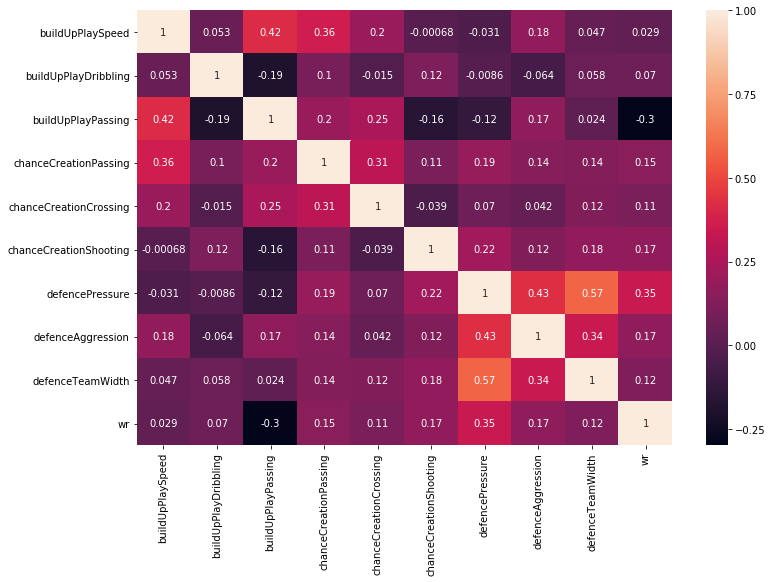

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(epl_df[epl_df.columns[9::]].corr(),annot=True)
plt.show()

In [28]:
epl_df

,team,hwr,hdr,har,awr,adr,aar,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,wr
0,FC Barcelona,0.861842,0.078947,0.059211,0.677632,0.203947,0.118421,241.0,8634.0,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,0.769737
1,Real Madrid CF,0.848684,0.072368,0.078947,0.651316,0.164474,0.184211,243.0,8633.0,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,0.750000
2,SL Benfica,0.822581,0.120968,0.056452,0.669355,0.169355,0.161290,234.0,9772.0,59.000000,55.0,45.500000,63.833333,59.000000,55.333333,54.333333,51.500000,52.000000,0.745968
3,FC Porto,0.822581,0.129032,0.048387,0.653226,0.209677,0.137097,236.0,9773.0,51.000000,50.0,48.666667,55.666667,66.833333,66.166667,53.333333,50.333333,55.333333,0.737903
4,Celtic,0.789474,0.151316,0.059211,0.644737,0.177632,0.177632,78.0,9925.0,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,0.717105
5,Rangers,0.736842,0.171053,0.092105,0.684211,0.157895,0.157895,86.0,8548.0,51.000000,51.0,45.500000,45.000000,62.500000,63.666667,49.666667,51.500000,58.666667,0.710526
6,FC Bayern Munich,0.801471,0.102941,0.095588,0.617647,0.220588,0.161765,21.0,9823.0,48.666667,29.0,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667,0.709559
7,Ajax,0.757353,0.176471,0.066176,0.573529,0.257353,0.169118,245.0,8593.0,35.166667,41.5,33.833333,50.666667,58.500000,49.666667,59.833333,53.833333,54.333333,0.665441
8,PSV,0.772059,0.132353,0.095588,0.536765,0.213235,0.250000,247.0,8640.0,52.333333,39.0,38.333333,50.166667,54.500000,54.000000,43.833333,41.500000,48.833333,0.654412
9,RSC Anderlecht,0.745283,0.198113,0.056604,0.537736,0.264151,0.198113,229.0,8635.0,51.333333,46.0,45.166667,63.500000,55.000000,51.333333,59.666667,47.666667,63.833333,0.641509


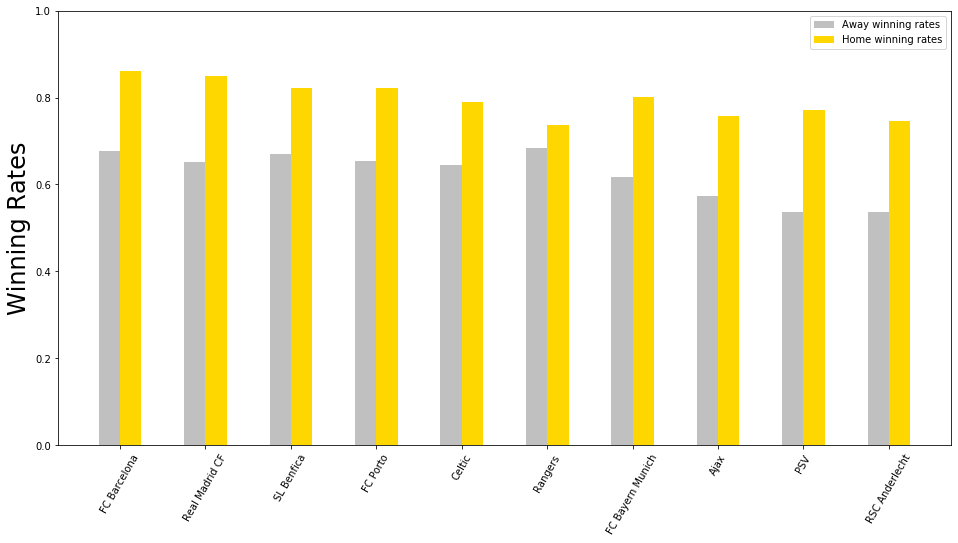

In [83]:
fig,ax=plt.subplots(figsize=(16,8))
ax.bar(epl_df['team'][0:10],epl_df['awr'][0:10],width=-0.25,align='edge',color='silver',label='Away winning rates')
ax.bar(epl_df['team'][0:10],epl_df['hwr'][0:10],width=0.25,align='edge',color='gold',label='Home winning rates')
plt.ylim((0,1))
plt.ylabel('Winning Rates',size=24)
plt.xticks(rotation=60)
plt.legend()
plt.savefig('images/top10hawr.png')

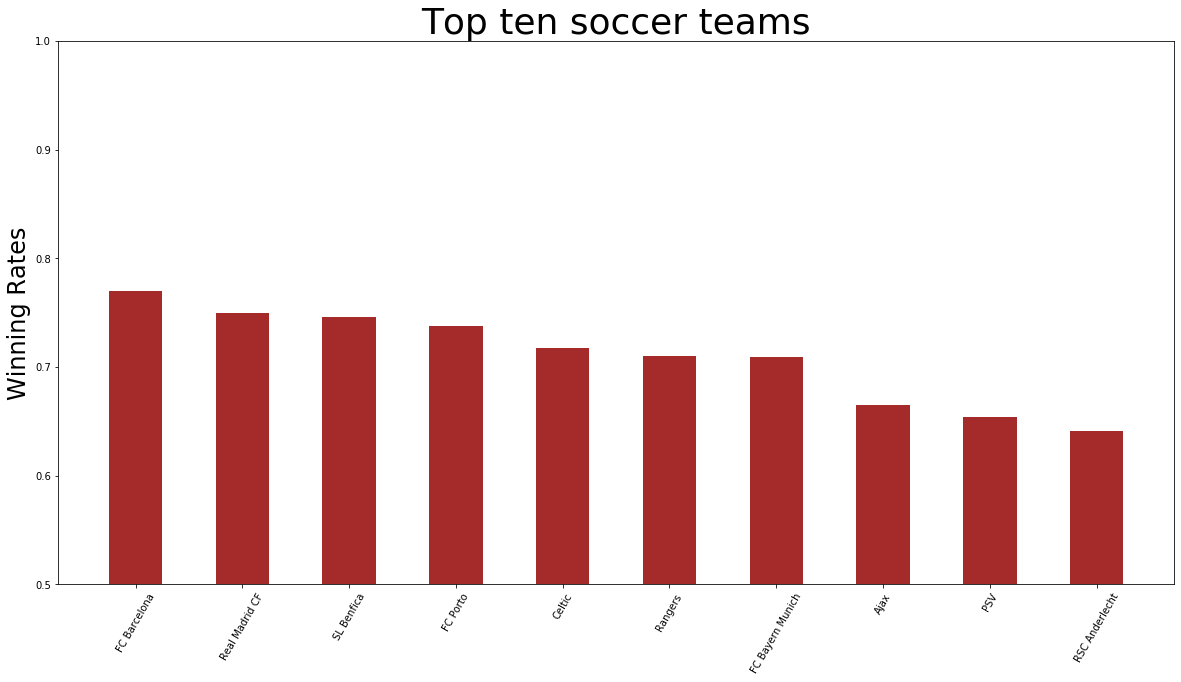

In [96]:
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(epl_df['team'][0:10],epl_df['wr'][0:10],width=0.5,color='brown')
plt.ylim((0.5,1))
plt.ylabel('Winning Rates',size=24)
plt.xticks(rotation=60)
# plt.title('Top 10 soccer teams', size=36)
plt.savefig('images/top10wr.png')

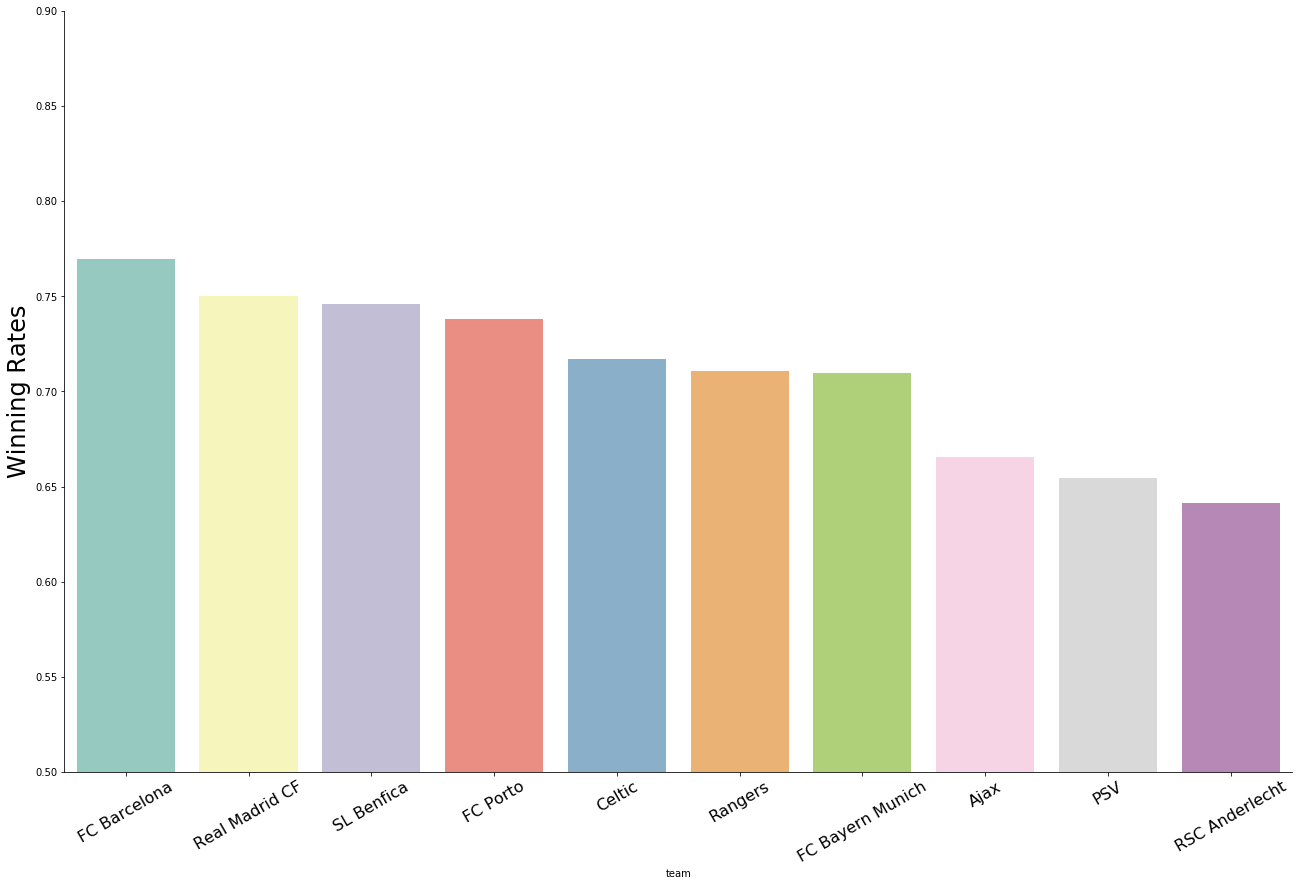

In [170]:
fig,ax=plt.subplots(figsize=(22,14))
top_10=epl_df.iloc[0:10]
p=sns.color_palette("Set3",10)
ax=sns.barplot(x='team',y='wr',data=top_10, palette=p)
# ax.bar(epl_df['team'][0:10],epl_df['awr'][0:10],width=-0.2,align='edge',color='pink',label='Away winning rates')
# ax.bar(epl_df['team'][0:10],epl_df['hwr'][0:10],width=0.2,align='edge',color='purple',label='Home winning rates')
plt.ylim((0.5,0.9))
plt.ylabel('Winning Rates',size=24)
plt.xticks(rotation=30,fontsize=16)
# fig=plt.figure(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.title('Top 10 soccer teams', size=36)
plt.savefig('images/top10wr.png',transparent=True)

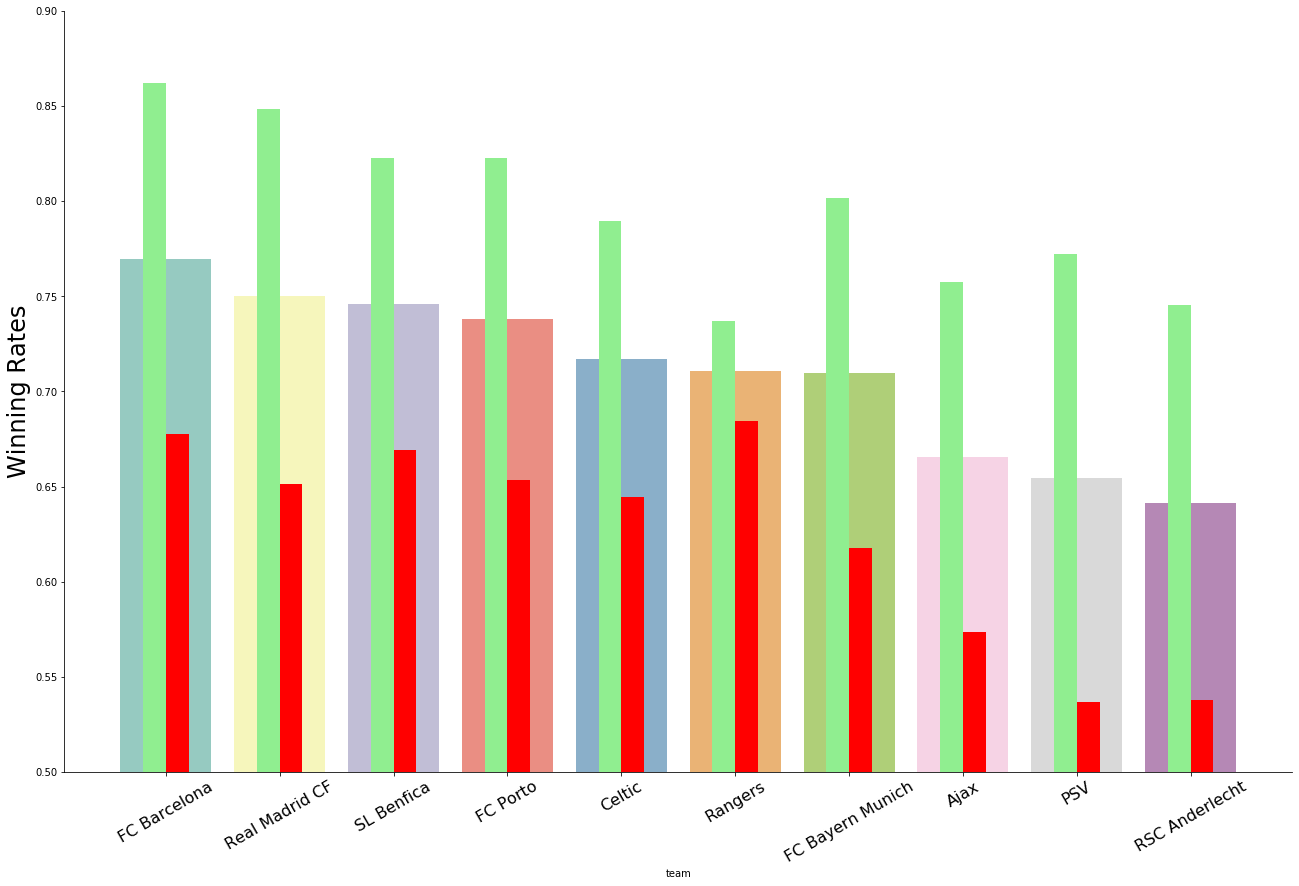

In [175]:
fig,ax=plt.subplots(figsize=(22,14))
top_10=epl_df.iloc[0:10]
p=sns.color_palette("Set3",10)
ax=sns.barplot(x='team',y='wr',data=top_10, palette=p)
ax.bar(epl_df['team'][0:10],epl_df['hwr'][0:10],width=-0.2,align='edge',color='lightgreen',label='Home winning rates')
ax.bar(epl_df['team'][0:10],epl_df['awr'][0:10],width=0.2,align='edge',color='red',label='Away winning rates')
plt.ylim((0.5,0.9))
plt.ylabel('Winning Rates',size=24)
plt.xticks(rotation=30,fontsize=16)
# fig=plt.figure(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.title('Top 10 soccer teams', size=36)
# ax.legend(fontsize=24)
plt.savefig('images/top10hawr.png',transparent=True)


Team attributes and winning rate:

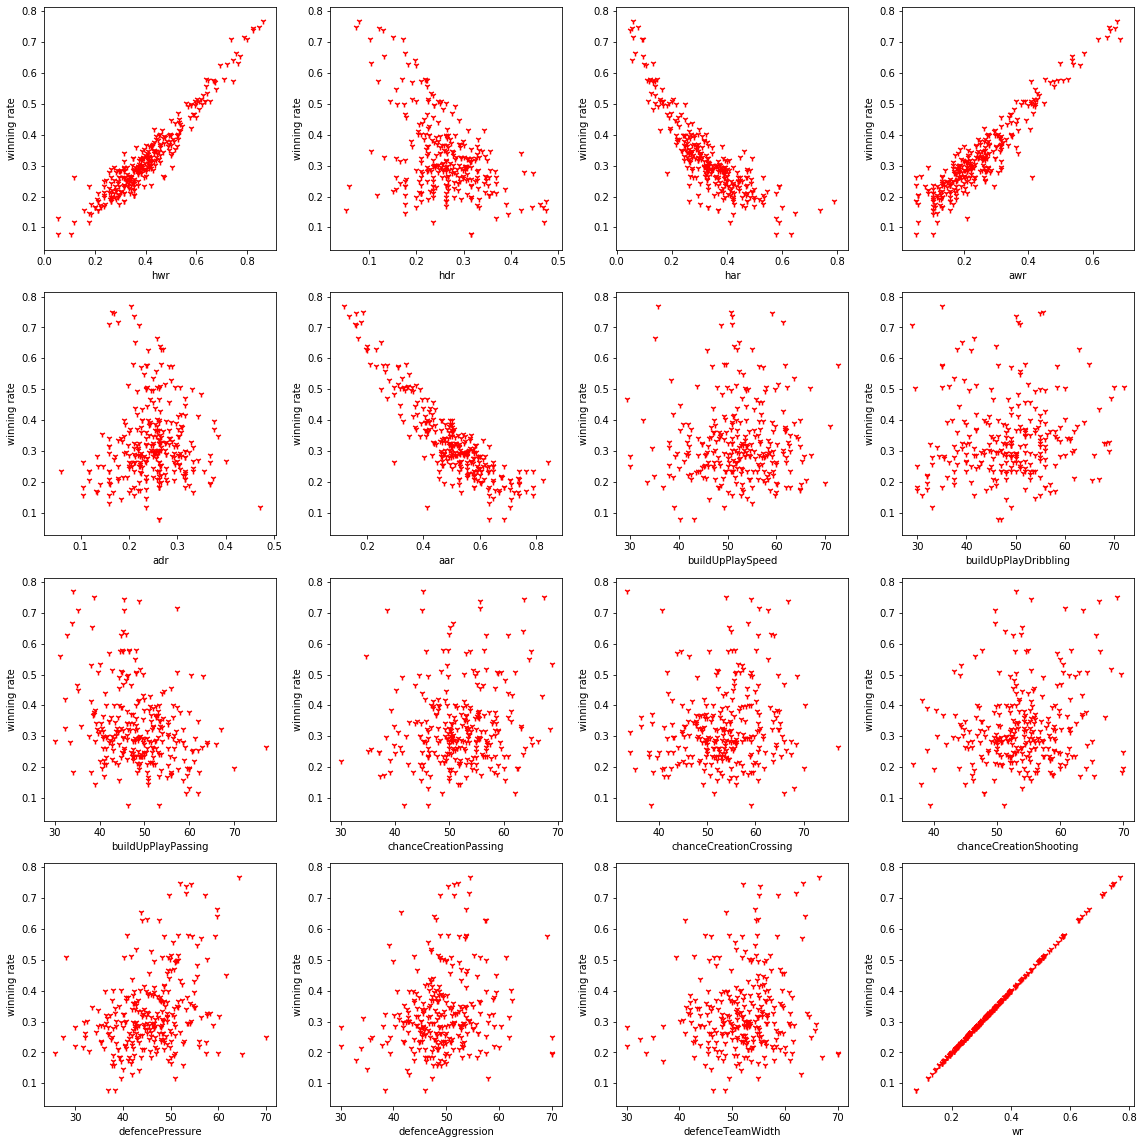

In [169]:
# epl_h_atr=epl_df[epl_df.columns[8:17]]
epl_h_atr=epl_df.drop(epl_df.columns[7:9],axis=1).set_index(['team'])

l=len(epl_h_atr.columns)
fig,axs=plt.subplots(4,4,figsize=(16,16))
for i,ax in enumerate(axs.flatten()):
    ax.scatter(epl_h_atr.iloc[:,i],epl_df.wr,color='red',marker='1')
    ax.set_xlabel(epl_h_atr.columns[i])
    ax.set_ylabel('winning rate')

plt.tight_layout()
plt.savefig('images/twr.png',transparent=True)
plt.show()

### Is there an affect on the game result for home and away?<br/><br/>
Null Hypothesis: There is no difference between home and away. <br/>
methodology: comparing home winning rate and away winning rate for teams <br/>

H<sub>0</sub>: mean(hwr-awr)=0

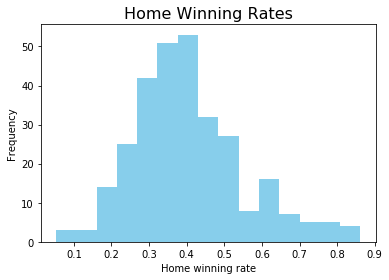

In [103]:
fig,ax=plt.subplots()
ax.hist(epl_df['hwr'],bins=15,color='skyblue')
ax.set_xlabel('Home winning rate')
ax.set_ylabel('Frequency')
ax.set_title("Home Winning Rates",size=16)
plt.savefig('images/hwr.png')

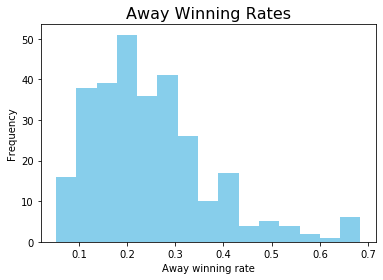

In [104]:
# plt.hist(epl_df['awr'],bins=15,color='skyblue')
# plt.savefig('images/awr.png')
fig,ax=plt.subplots()
ax.hist(epl_df['awr'],bins=15,color='skyblue')
ax.set_xlabel('Away winning rate')
ax.set_ylabel('Frequency')
ax.set_title("Away Winning Rates",size=16)
plt.savefig('images/awr.png')

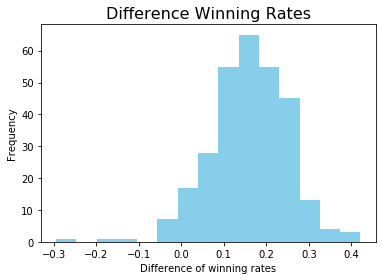

In [105]:

# plt.hist(epl_df['hwr']-epl_df['awr'],bins=15,color='skyblue')
# plt.savefig('images/diff.png')
fig,ax=plt.subplots()
ax.hist(epl_df['hwr']-epl_df['awr'],bins=15,color='skyblue')
ax.set_xlabel('Difference of winning rates')
ax.set_ylabel('Frequency')
ax.set_title("Difference Winning Rates",size=16)
plt.savefig('images/diff.png')

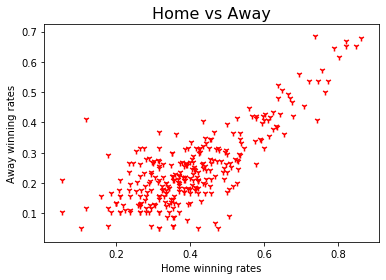

In [107]:
# plt.scatter(epl_df['hwr'],epl_df['awr'],color='red',marker='1')
# plt.savefig('images/hawr.png')
fig,ax=plt.subplots()
ax.scatter(epl_df['hwr'],epl_df['awr'],color='red', marker='1')
ax.set_xlabel('Home winning rates')
ax.set_ylabel('Away winning rates')
ax.set_title("Home vs Away",size=16)
plt.savefig('images/hawr.png')

(array([ 4., 10., 37., 44., 65., 44., 33., 12.,  8., 16.,  9.,  2.,  4.,
         3.,  4.]),
 array([0.07894737, 0.125     , 0.17105263, 0.21710526, 0.26315789,
        0.30921053, 0.35526316, 0.40131579, 0.44736842, 0.49342105,
        0.53947368, 0.58552632, 0.63157895, 0.67763158, 0.72368421,
        0.76973684]),
 <a list of 15 Patch objects>)

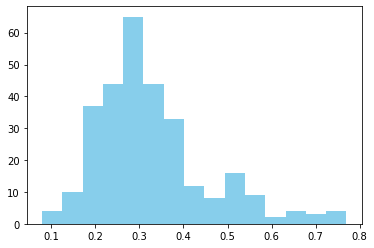

In [70]:
plt.hist(epl_df['wr'],bins=15,color='skyblue')

In [49]:
import scipy.stats as stats
h=epl_df['hwr'][0:295]
for i in h: print(i)

0.8618421052631579
0.8486842105263158
0.8225806451612904
0.8225806451612904
0.7894736842105263
0.7368421052631579
0.8014705882352942
0.7573529411764706
0.7720588235294118
0.7452830188679245
0.7631578947368421
0.7202797202797203
0.695364238410596
0.6370967741935484
0.7075471698113207
0.6644736842105263
0.6470588235294118
0.743421052631579
0.6710526315789473
0.675
0.6381578947368421
0.6776315789473685
0.6423841059602649
0.625
0.6166666666666667
0.6029411764705882
0.6323529411764706
0.6333333333333333
0.609271523178808
0.5960264900662252
0.6532258064516129
0.5588235294117647
0.5986842105263158
0.5779816513761468
0.6226415094339622
0.5789473684210527
0.5944055944055944
0.5657894736842105
0.6118421052631579
0.5263157894736842
0.5921052631578947
0.5882352941176471
0.5754716981132075
0.5986842105263158
0.5333333333333333
0.5
0.5333333333333333
0.5151515151515151
0.5364238410596026
0.5441176470588235
0.5789473684210527
0.43356643356643354
0.4649122807017544
0.5328947368421053
0.533834586466165

In [50]:
stats.ttest_ind(h,epl_df['awr'],equal_var=False)

Ttest_indResult(statistic=14.205152873949768, pvalue=1.8320809347036165e-39)

In [51]:
hm=a.mean()
am=epl_df['awr'].mean()
n=len(epl_df['awr'])
hvar=sum((h-hm)**2)/(n-1)
avar=sum((epl_df['awr']-am)**2)/(n-1)
t=(hm-am)/np.sqrt(hvar/n+avar/n)
df=2*n-2
t

AttributeError: 'list' object has no attribute 'mean'

In [52]:
(epl_df['awr'])

0      0.677632
1      0.651316
2      0.669355
3      0.653226
4      0.644737
5      0.684211
6      0.617647
7      0.573529
8      0.536765
9      0.537736
10     0.500000
11     0.538462
12     0.560000
13     0.524194
14     0.452830
15     0.493421
16     0.507353
17     0.407895
18     0.480263
19     0.466667
20     0.480263
21     0.421053
22     0.427632
23     0.433824
24     0.416667
25     0.426471
26     0.389706
27     0.384106
28     0.407895
29     0.421053
         ...   
266    0.129032
267    0.122807
268    0.105263
269    0.176471
270    0.157895
271    0.157895
272    0.105263
273    0.052632
274    0.105263
275    0.052632
276    0.058824
277    0.166667
278    0.111111
279    0.127273
280    0.105263
281    0.133333
282    0.133333
283    0.133333
284    0.111111
285    0.157895
286    0.105263
287    0.105263
288    0.117647
289    0.105263
290    0.210526
291    0.058824
292    0.117647
293    0.052632
294    0.105263
295    0.235294
Name: awr, Length: 296, 

Player attribute and winning rate:

In [92]:
player_avg[player_avg['player_api_id']==24224.0]

,player_name,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
9522,Shay Given,161972.0,2651.0,24224.0,78.444444,79.111111,17.62963,18.37037,17.851852,35.185185,21.111111,18.111111,21.111111,19.0,41.407407,21.925926,44.962963,49.259259,46.185185,69.703704,62.259259,38.888889,76.777778,44.333333,60.481481,17.62963,59.407407,37.333333,25.111111,36.925926,46.296296,18.962963,17.407407,15.0,79.666667,75.481481,71.777778,79.740741,81.518519,185.42,185.0


In [982]:
for i,c in enumerate(epl.columns):
    print (i,c)


0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

FileNotFoundError: [Errno 2] No such file or directory: 'image/sqdfmt.png'

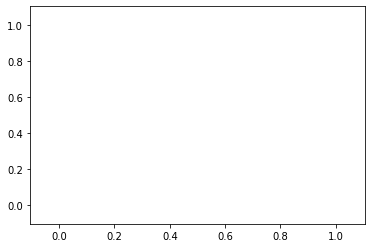

In [43]:
epl.iloc[1,11:55]
home_x=epl.iloc[51,11:22]
home_y=epl.iloc[51,33:44]
# home_cord=np.array(tuple(zip(home_x,home_y)))
away_x=epl.iloc[51,22:33]
away_y=epl.iloc[51,44:55]
# away_cord=np.array(tuple(zip(home_x,home_y)))
plt.scatter(home_x,home_y)#home_cord[:,0],home_cord[:,1])
plt.scatter(away_x,25-away_y)#away_cord[:,0],away_cord[:,1])
plt.savefig('image/sqdfmt.png')
plt.show()

In [1014]:
epl

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,results
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.50,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,NaN,NaN,NaN,1.25,4.50,10.00,1.25,5.00,10.00,1.28,5.50,12.00,1.30,4.75,10.00,1.29,4.50,11.00,D
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,5.0,7.0,9.0,1.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,30960.0,36410.0,36373.0,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.50,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,NaN,NaN,NaN,1.17,5.50,12.00,1.20,5.50,12.00,1.25,6.00,13.00,1.22,5.50,13.00,1.22,5.00,13.00,H
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,23927.0,24410.0,30660.0,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></s

In [778]:
epl_buildUp=epl_df[epl_df.columns[5:8]]
epl_chanceCreation=epl_df[epl_df.columns[8:11]]
epl_defence=epl_df[epl_df.columns[11:14]]

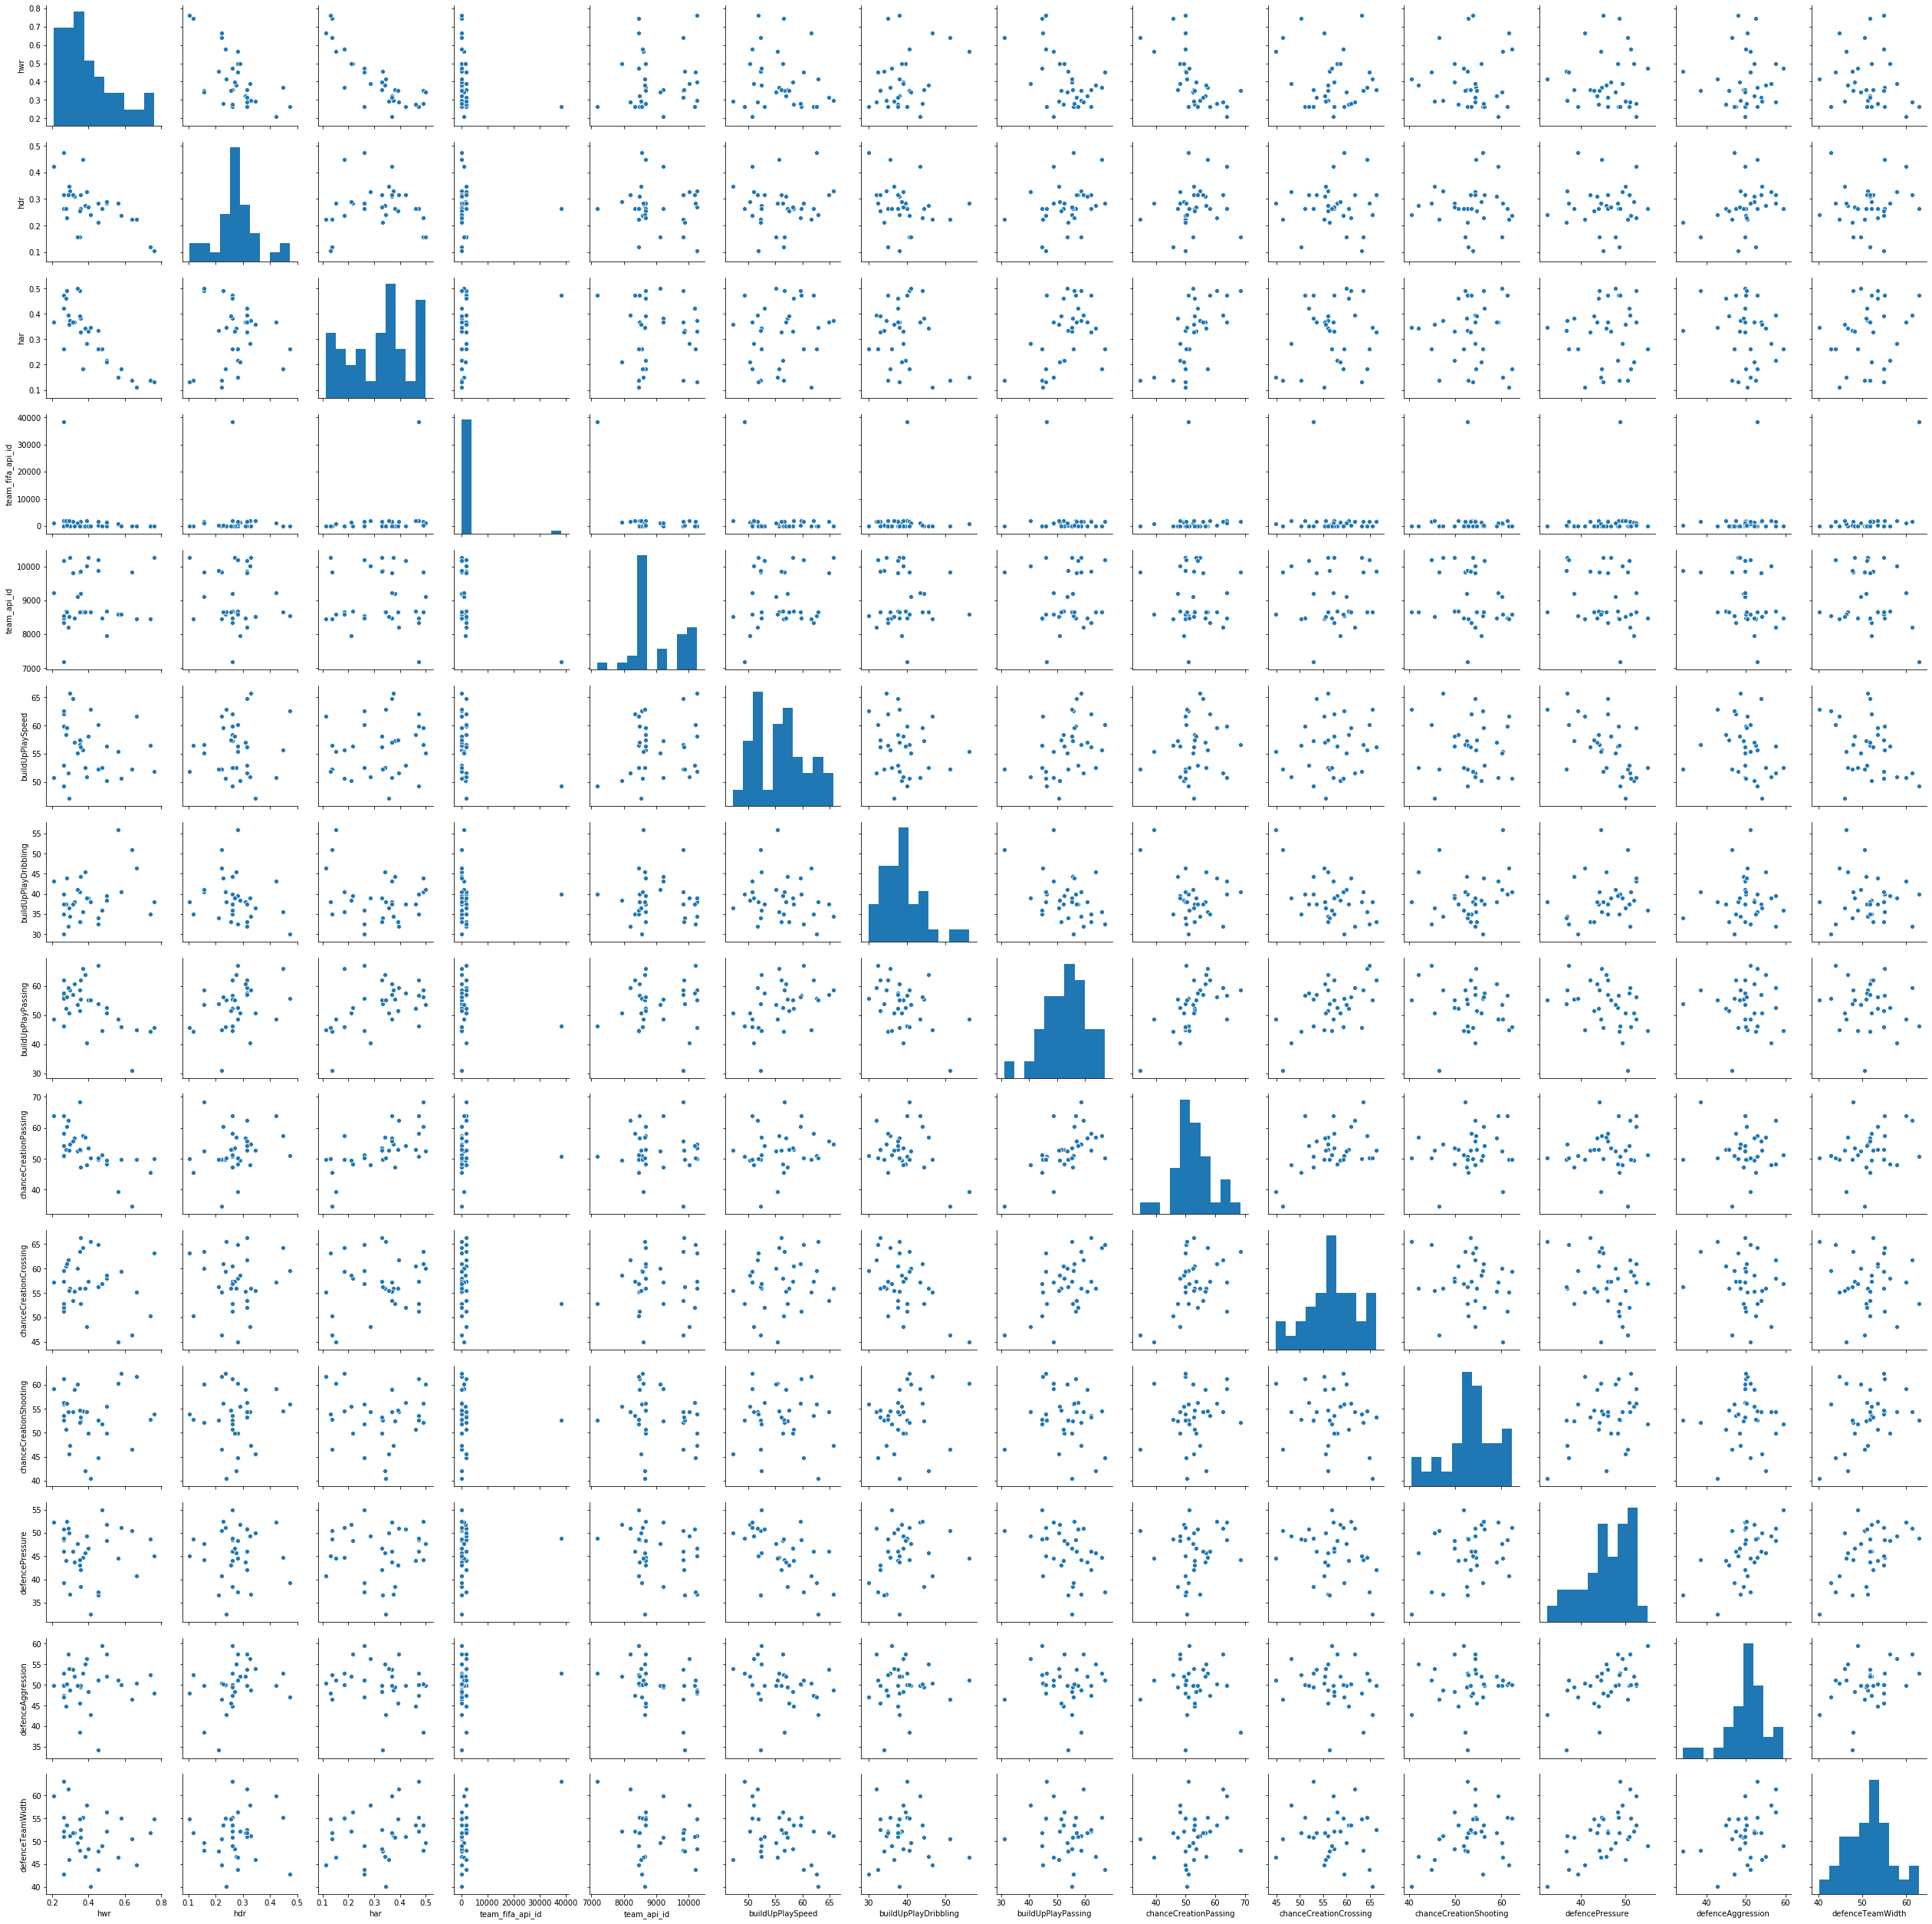

In [838]:
sns.pairplot(epl_df)

# sns.pairplot(epl_buildUp)

In [809]:
def linReg(x,y):
    '''Return coef of linear regression models
    para: x - matrix, size(n,p)
          y - outcomes, size(n)
    return:
          coef - np.ndarray'''
    n=x.shape[0]
    p=x.shape[1]
    return np.linalg.inv(x.T@x)@x.T@y

In [835]:
coef_buildUp_hw=linReg(epl_buildUp,epl_df['hwr'])
coef_buildUp_hw

0    0.008335
1    0.008220
2   -0.007264
dtype: float64

In [831]:
coef_chanceCreation=linReg(epl_chanceCreation,epl_df['hwr'])
coef_chanceCreation

0   -0.016726
1    0.012647
2    0.010545
dtype: float64